# Mnist Digit Recognition

In [43]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt

In [2]:
#mnist data load
mnist = keras.datasets.mnist

In [85]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>


### Normalizing

In [87]:
# normalizing
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255.0

x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255.0

### Why 255?

1 byte of information = 8 bits. each bit has 2 values 0 or 1; the color intensity is 2^8=256 possible value; i.e. goes from 0 to 255

by dividing by 255, we are making maximum value 1. Now black will be 1 and 0 is white; with various shades of grey in between

### Setting callbacks
If required accuracy met then training gets stopped

In [88]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('val_accuracy')>0.99:
            print('\n 99% validation accuracy achived so stopping the training')
            self.model.stop_training=True

callbacks = myCallback()

#### #Avoid this step if using loss=sparce_categorical_crossentropy
y_train = keras.utils.to_categorical(y_train, num_classes=10) 
y_test = keras.utils.to_categorical(y_test, num_classes=10)

## Model

In [89]:
# model
model = keras.Sequential(
                        [layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
                        layers.BatchNormalization(),
                        layers.MaxPooling2D(2,2),
                        layers.SpatialDropout2D(0.2),
                        layers.Conv2D(32, (3,3), activation='relu'),
                        layers.BatchNormalization(),
                        layers.MaxPooling2D(2,2),
                        layers.SpatialDropout2D(0.2),
                        layers.Flatten(),
                        layers.Dense(20, activation='relu'),
                        layers.Dense(10, activation='softmax')]
                        )

# compiling
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [90]:
# fitting model
history = model.fit(x_train, y_train, validation_split=0.1, verbose=1, epochs=10, callbacks=callbacks, batch_size=128)

Epoch 1/10
422/422 [==============================] - 28s 66ms/step - loss: 0.3209 - accuracy: 0.8999 - val_loss: 0.6273 - val_accuracy: 0.8177
Epoch 2/10
422/422 [==============================] - 27s 65ms/step - loss: 0.0928 - accuracy: 0.9720 - val_loss: 0.0501 - val_accuracy: 0.9868
Epoch 3/10
422/422 [==============================] - 28s 66ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0396 - val_accuracy: 0.9882
Epoch 4/10
422/422 [==============================] - 27s 65ms/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0398 - val_accuracy: 0.9895
Epoch 5/10
422/422 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9843
 99% validation accuracy achived so stopping the training
422/422 [==============================] - 28s 66ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0385 - val_accuracy: 0.9900


### Visualizing loss and accuracy

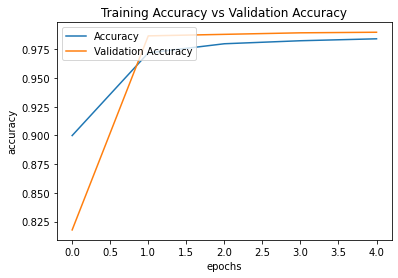

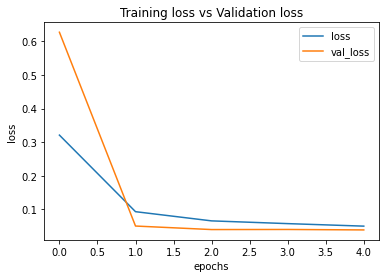

In [91]:
# plotting loss and accuracy

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training loss vs Validation loss')
plt.show()

In [92]:
# evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9893


[0.036681607365608215, 0.989300012588501]

### Checking which images are predicted incorrectly
using x_test data

In [75]:
y_pred = model.predict(x_test)
y_pred_label = []
for i in y_pred:
    y_pred_label.append(i.argmax())
    
y_test_label = []
for i in y_test:
    y_test_label.append(i.argmax())

predicted:  8 Actual:  3


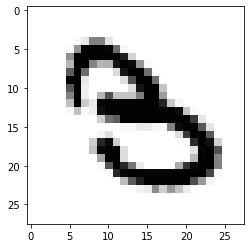

predicted:  5 Actual:  9


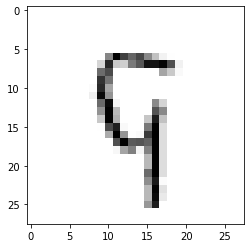

predicted:  7 Actual:  2


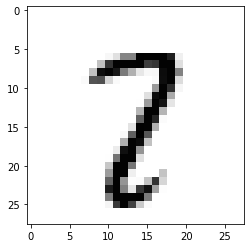

predicted:  5 Actual:  3


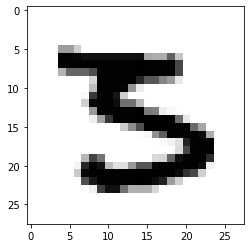

predicted:  5 Actual:  3


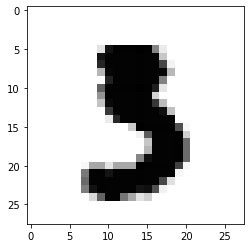

predicted:  2 Actual:  8


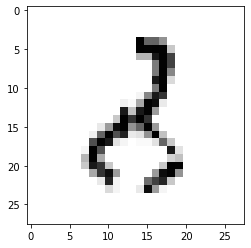

predicted:  1 Actual:  2


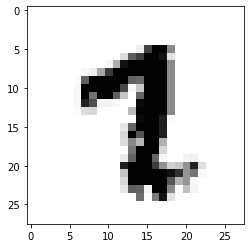

predicted:  5 Actual:  0


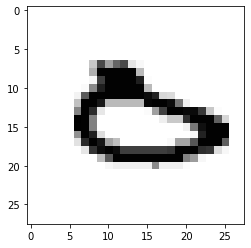

predicted:  7 Actual:  8


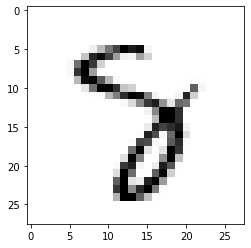

predicted:  5 Actual:  3


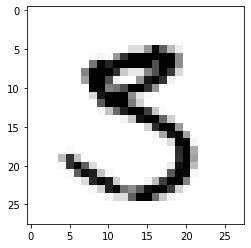

predicted:  9 Actual:  8


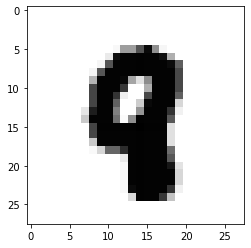

predicted:  5 Actual:  6


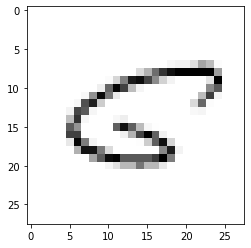

predicted:  1 Actual:  7


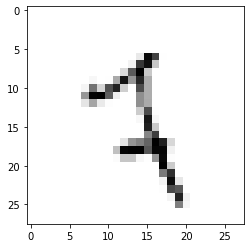

predicted:  7 Actual:  3


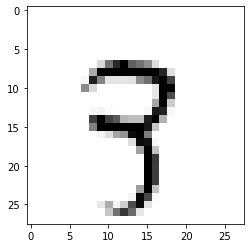

predicted:  4 Actual:  8


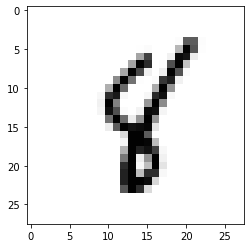

predicted:  6 Actual:  4


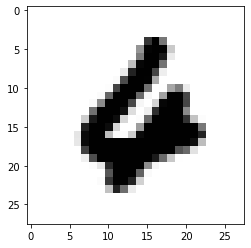

predicted:  5 Actual:  6


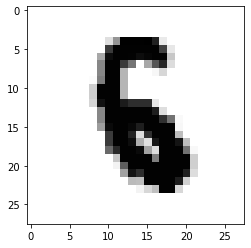

predicted:  2 Actual:  7


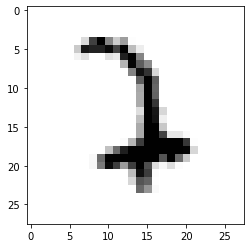

predicted:  4 Actual:  9


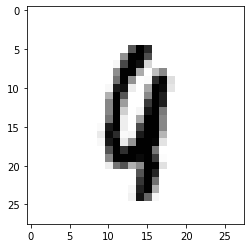

predicted:  9 Actual:  4


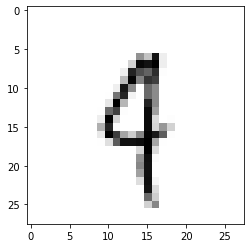

predicted:  5 Actual:  9


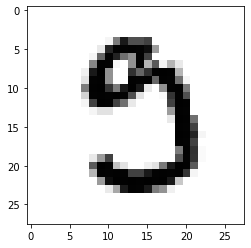

predicted:  5 Actual:  3


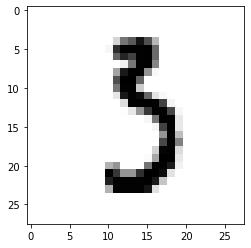

predicted:  7 Actual:  5


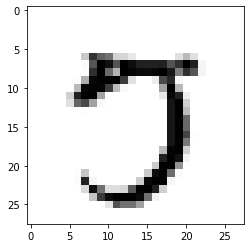

predicted:  0 Actual:  8


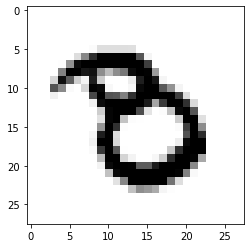

predicted:  2 Actual:  7


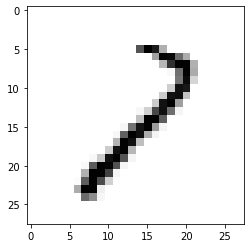

predicted:  7 Actual:  9


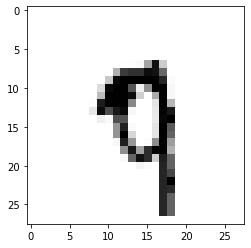

predicted:  7 Actual:  8


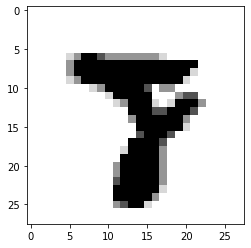

predicted:  6 Actual:  0


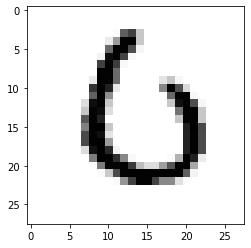

predicted:  7 Actual:  3


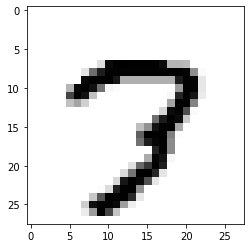

predicted:  5 Actual:  9


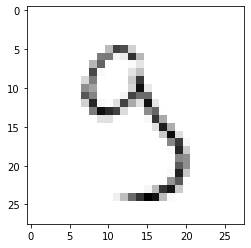

predicted:  0 Actual:  8


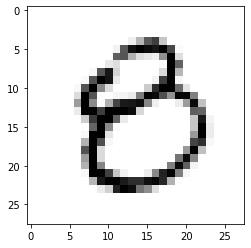

predicted:  7 Actual:  2


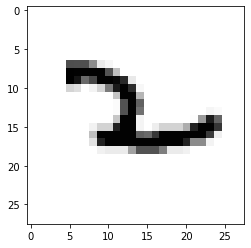

predicted:  2 Actual:  7


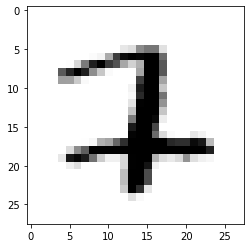

predicted:  7 Actual:  2


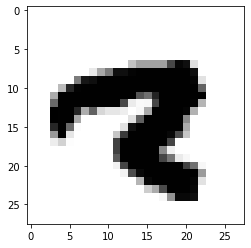

predicted:  4 Actual:  9


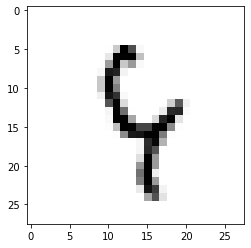

predicted:  0 Actual:  2


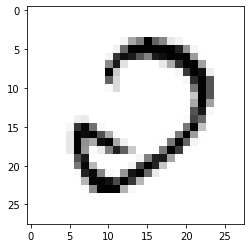

predicted:  0 Actual:  6


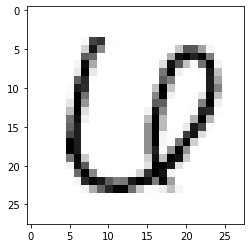

predicted:  9 Actual:  4


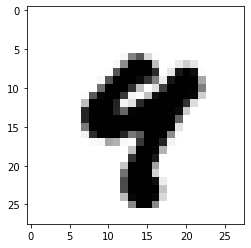

predicted:  1 Actual:  6


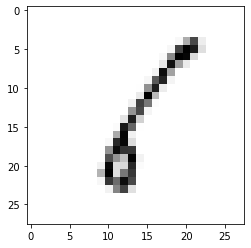

predicted:  5 Actual:  3


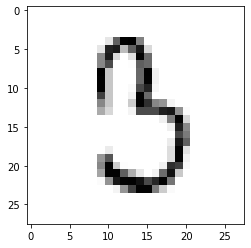

predicted:  6 Actual:  9


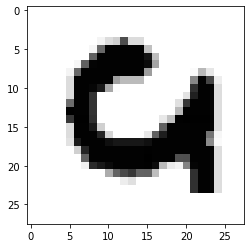

predicted:  1 Actual:  9


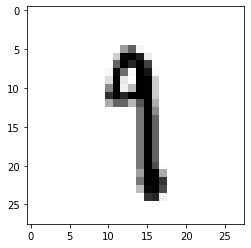

predicted:  4 Actual:  9


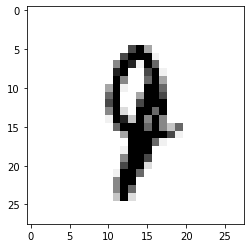

predicted:  5 Actual:  6


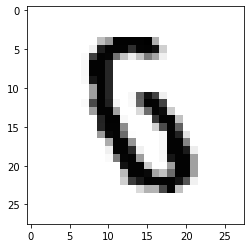

predicted:  0 Actual:  2


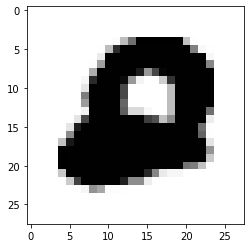

predicted:  4 Actual:  2


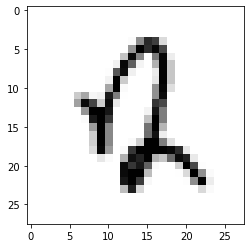

predicted:  1 Actual:  6


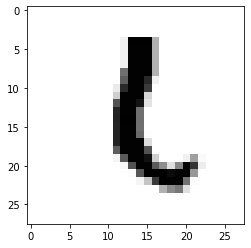

predicted:  0 Actual:  8


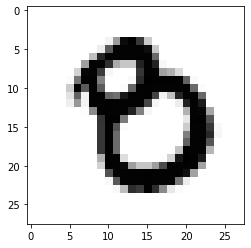

predicted:  2 Actual:  3


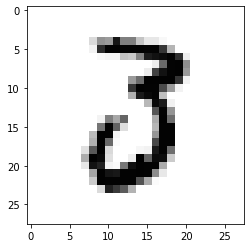

predicted:  7 Actual:  3


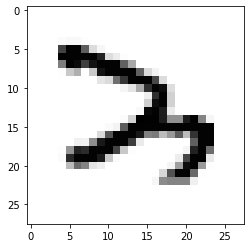

predicted:  5 Actual:  9


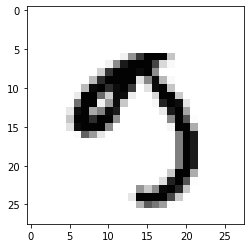

predicted:  5 Actual:  3


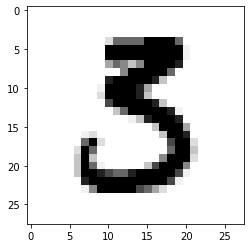

predicted:  5 Actual:  3


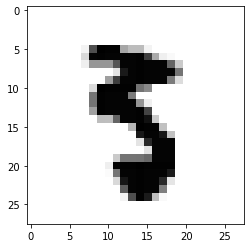

predicted:  5 Actual:  6


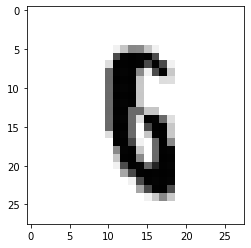

predicted:  0 Actual:  6


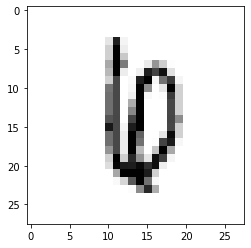

predicted:  7 Actual:  9


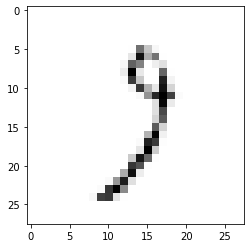

predicted:  2 Actual:  1


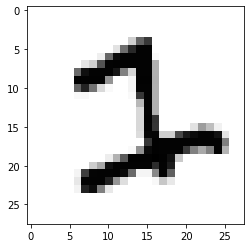

predicted:  9 Actual:  8


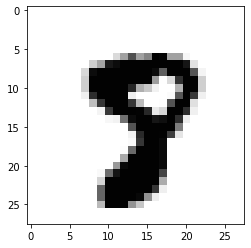

predicted:  0 Actual:  2


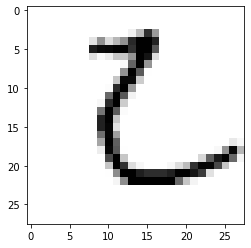

predicted:  7 Actual:  3


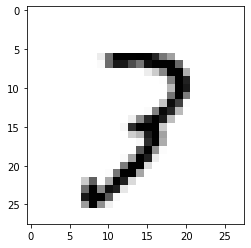

predicted:  1 Actual:  9


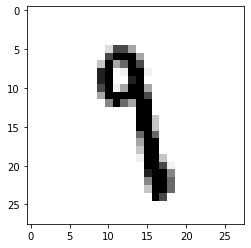

predicted:  4 Actual:  6


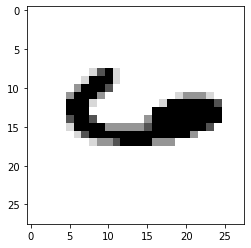

predicted:  5 Actual:  6


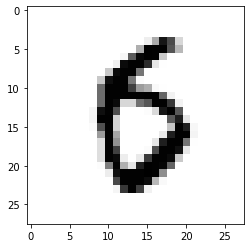

predicted:  0 Actual:  8


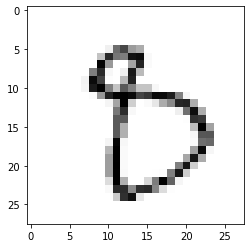

predicted:  5 Actual:  9


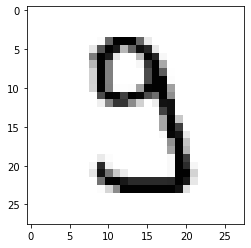

predicted:  9 Actual:  8


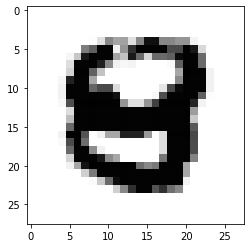

predicted:  2 Actual:  7


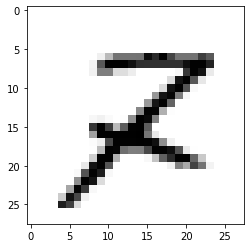

predicted:  4 Actual:  9


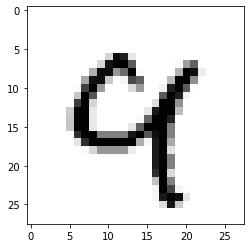

predicted:  4 Actual:  9


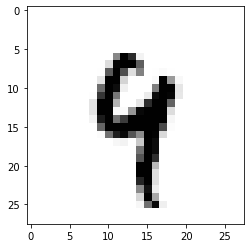

predicted:  5 Actual:  3


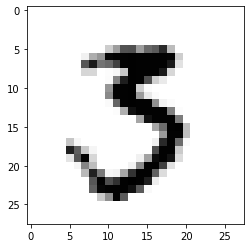

predicted:  5 Actual:  6


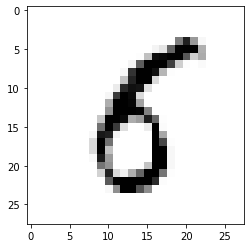

predicted:  2 Actual:  9


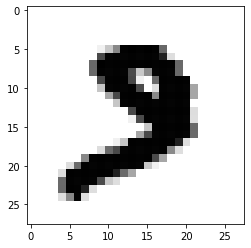

predicted:  0 Actual:  9


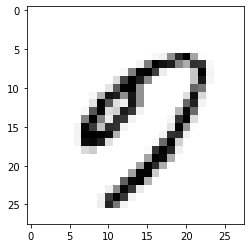

predicted:  7 Actual:  2


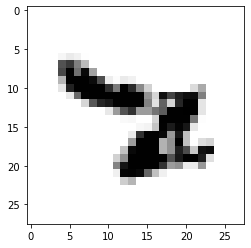

predicted:  0 Actual:  2


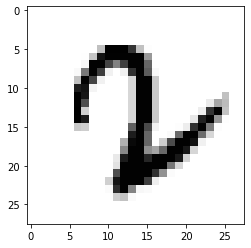

predicted:  7 Actual:  9


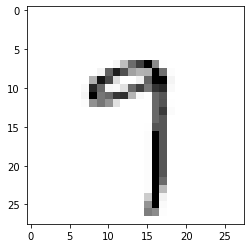

predicted:  1 Actual:  2


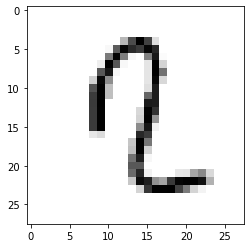

predicted:  2 Actual:  3


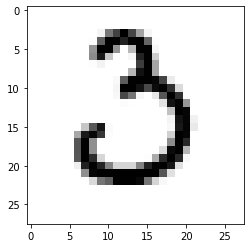

predicted:  5 Actual:  9


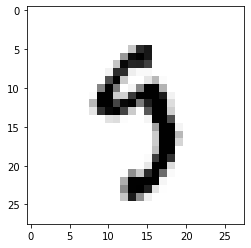

predicted:  7 Actual:  3


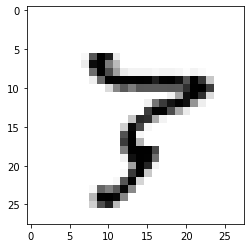

predicted:  7 Actual:  8


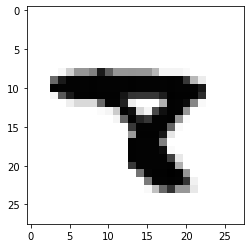

predicted:  1 Actual:  9


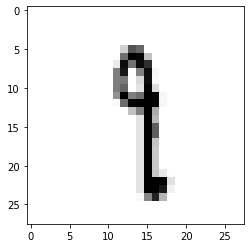

predicted:  5 Actual:  6


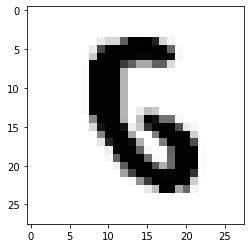

predicted:  9 Actual:  8


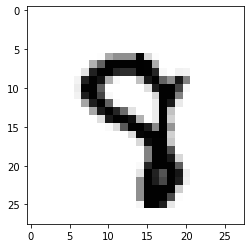

predicted:  7 Actual:  8


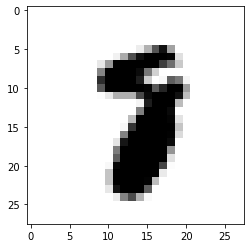

predicted:  5 Actual:  3


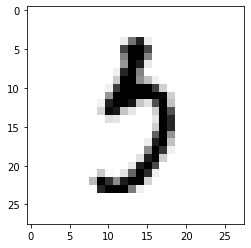

predicted:  6 Actual:  4


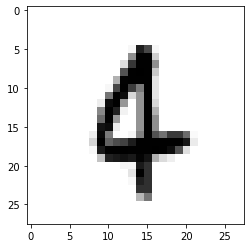

predicted:  0 Actual:  8


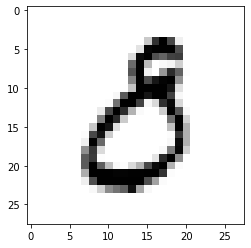

predicted:  4 Actual:  8


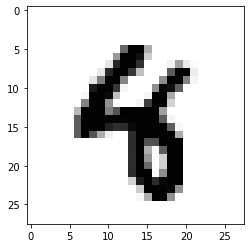

predicted:  8 Actual:  3


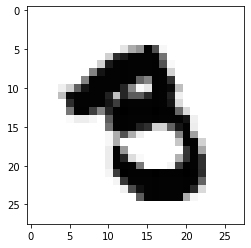

predicted:  8 Actual:  3


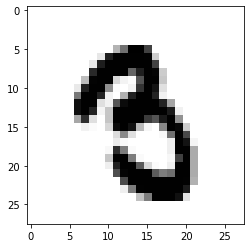

predicted:  9 Actual:  5


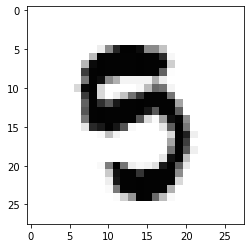

predicted:  5 Actual:  9


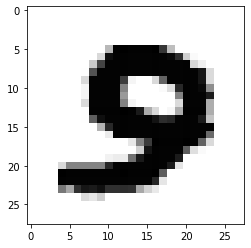

predicted:  5 Actual:  9


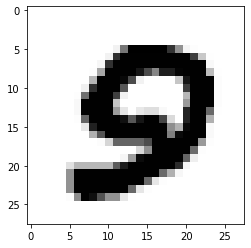

predicted:  0 Actual:  9


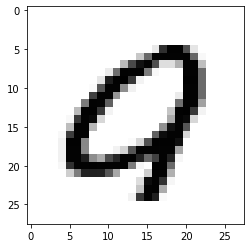

predicted:  7 Actual:  0


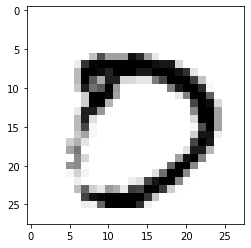

predicted:  9 Actual:  8


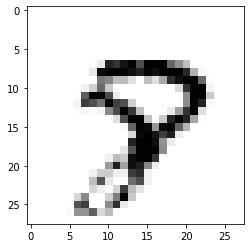

predicted:  5 Actual:  9


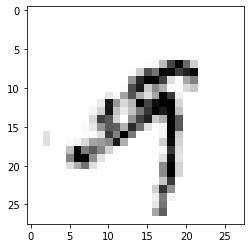

predicted:  1 Actual:  7


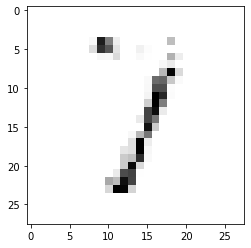

predicted:  7 Actual:  0


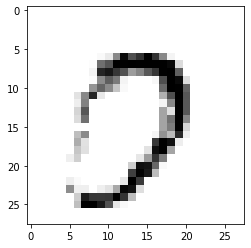

predicted:  2 Actual:  8


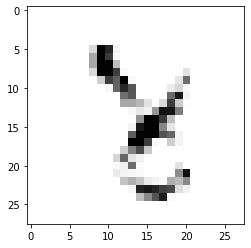

predicted:  8 Actual:  0


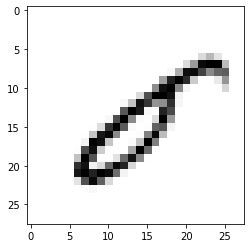

predicted:  6 Actual:  1


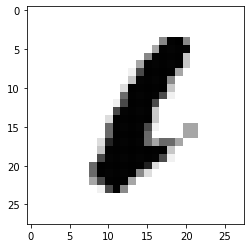

predicted:  9 Actual:  8


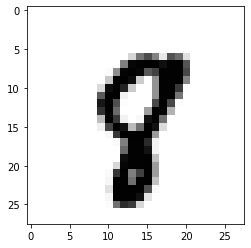

predicted:  1 Actual:  2


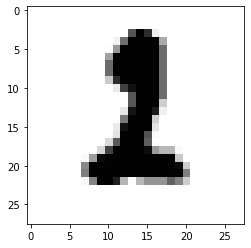

predicted:  2 Actual:  0


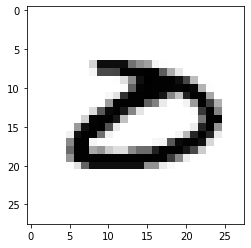

predicted:  5 Actual:  8


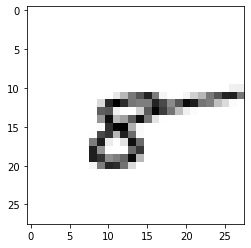

predicted:  2 Actual:  7


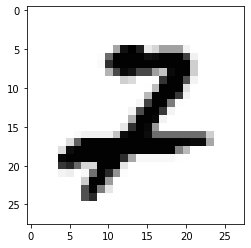

predicted:  2 Actual:  7


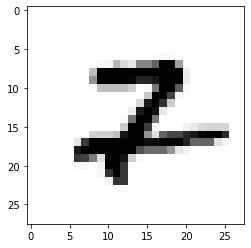

predicted:  7 Actual:  9


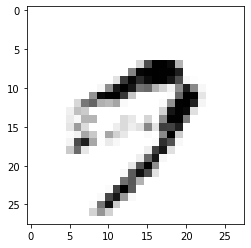

predicted:  7 Actual:  2


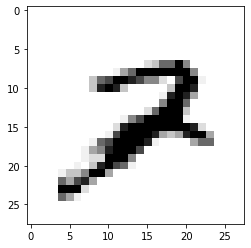

predicted:  7 Actual:  9


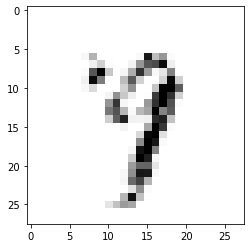

predicted:  5 Actual:  6


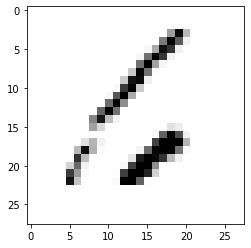

predicted:  6 Actual:  5


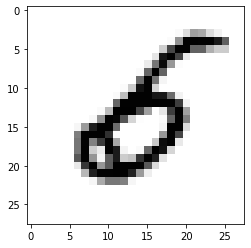

predicted:  0 Actual:  5


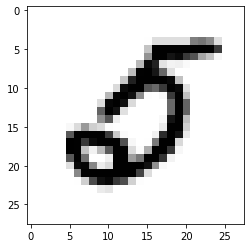

predicted:  5 Actual:  3


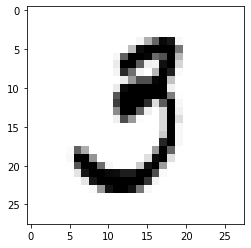

predicted:  7 Actual:  2


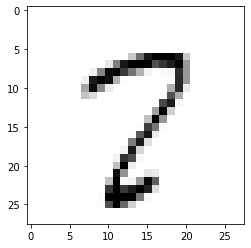

predicted:  5 Actual:  9


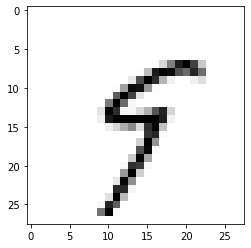

predicted:  8 Actual:  2


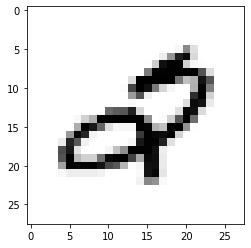

predicted:  7 Actual:  3


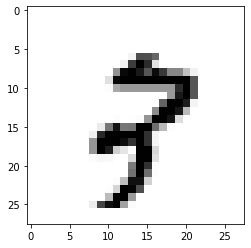

predicted:  6 Actual:  5


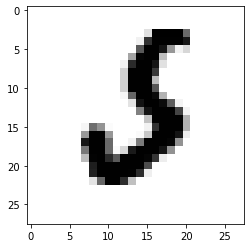

In [76]:
s=0
incorrect=[]
for i,j in zip(y_pred_label, y_test_label):
    if i==j:
        pass
    else:
        print('predicted: ', i, 'Actual: ', j)
        plt.imshow(x_test[s, :, :, 0], cmap='Greys')
        plt.show()
        incorrect.append(tuple((i,j)))
    s+=1

In [77]:
print(f'Out of {len(x_test)}, {len(incorrect)} are predicted incorrectly')

Out of 10000, 121 are predicted incorrectly
